In [1]:
# load needed python libraries matplotlib, numpy, and scikit-rf
import matplotlib.pyplot as plt
import numpy as np
import skrf as rf
import json

In [2]:
caldata = rf.read_all()

In [3]:
short_network = rf.Network(frequency=caldata['short'].f, s=caldata['short'].s[:,0,0], z0=50)
open_network = rf.Network(frequency=caldata['open'].f, s=caldata['open'].s[:,0,0], z0=50)
load_network = rf.Network(frequency=caldata['load'].f, s=caldata['load'].s[:,0,0], z0=50)


In [11]:
print("len = " + str(len(load_network.f)))
print(load_network.f[1600])


len = 1601
9000000000.0


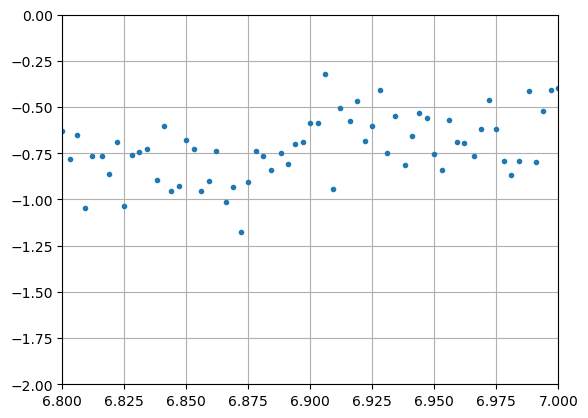

In [47]:
plt.plot(fghz,short_network.s_db[:,0,0],'.')
plt.xlim(6.8,7)
plt.ylim(-2,0)
plt.grid()

In [4]:
my_measured_ecal = [\
        short_network,
        open_network,
        load_network,
        ]

In [5]:
tier2 = rf.read_all("tier2-caldata-3k")

In [6]:
my_ideals_scikitrf_port6 = [\
        tier2['port6_short_tier2'],
        tier2['port6_open_tier2'],
        tier2['port6_load_tier2'],
        ]

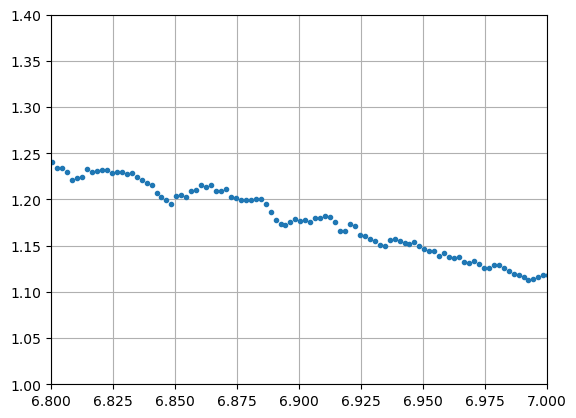

In [73]:
plt.plot(tier2['port6_short_tier2'].f/1e9,tier2['port6_short_tier2'].s_db[:,0,0],'.')
plt.xlim(6.8,7)
plt.ylim(1,1.4)
plt.grid()

In [7]:
cal_scikitrf_port6 = rf.OnePort(\
        ideals = my_ideals_scikitrf_port6,
        measured = my_measured_ecal,
        )

                    attempting to interpolate the ideal[0] Network ..
Success
                    attempting to interpolate the ideal[1] Network ..
Success
                    attempting to interpolate the ideal[2] Network ..
Success


In [8]:
cal_scikitrf_port6.run()

In [9]:
scandata = rf.read_all('jpa-nopump-scan2')


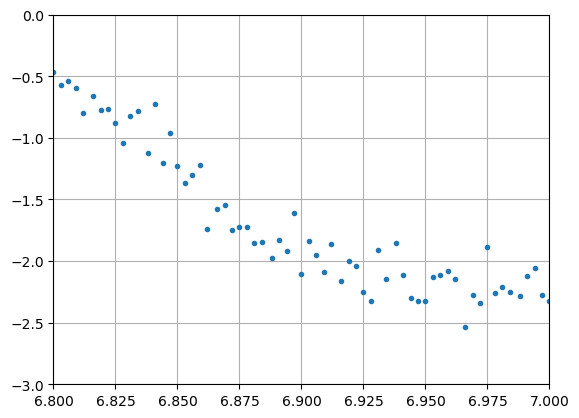

In [53]:
plt.plot(fghz,scandata['trace0'].s_db[:,0,0],'.')
plt.xlim(6.8,7)
plt.ylim(-3,0)
plt.grid()

In [19]:
for index in range(len(scandata)):
    trace_network = rf.Network(frequency=scandata['trace' + str(index)].f, s=scandata['trace' + str(index)].s[:,0,0], z0=50)
    trace_network.write_touchstone('jpa-nopump-scan2-s1p/trace' + str(index) + '.s1p')

In [18]:
scandatas1p = rf.read_all('jpa-nopump-scan2-s1p')


In [23]:
for index in range(len(scandatas1p)):
    trace_corrected = cal_scikitrf_port6.apply_cal(scandatas1p['trace' + str(index)])
    trace_corrected.write_touchstone('jpa-nopump-scan2-s1p-corrected/trace' + str(index) + '.s1p')

In [19]:
fghz = scandatas1p['trace0'].f/1e9

Text(0.5, 1.0, 'Raw data, Uncorrected')

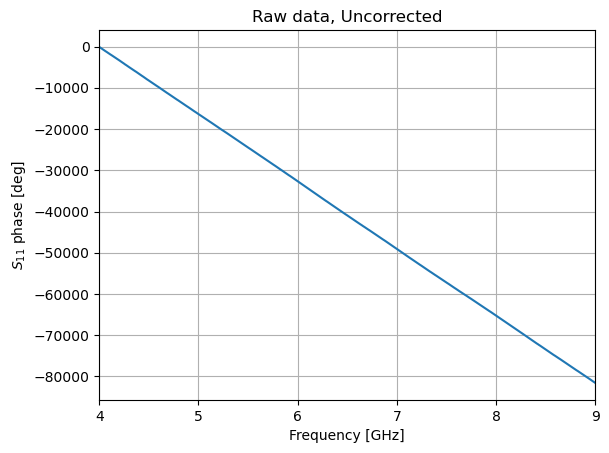

In [23]:
plt.plot(fghz,scandatas1p['trace0'].s_deg_unwrap[:,0,0])
plt.xlim(fghz[0],fghz[len(fghz)- 1])
plt.grid()
plt.xlabel('Frequency [GHz]')
plt.ylabel('$S_{11}$ phase [deg]')
plt.title('Raw data, Uncorrected')

Text(0.5, 1.0, 'Raw data, Uncorrected')

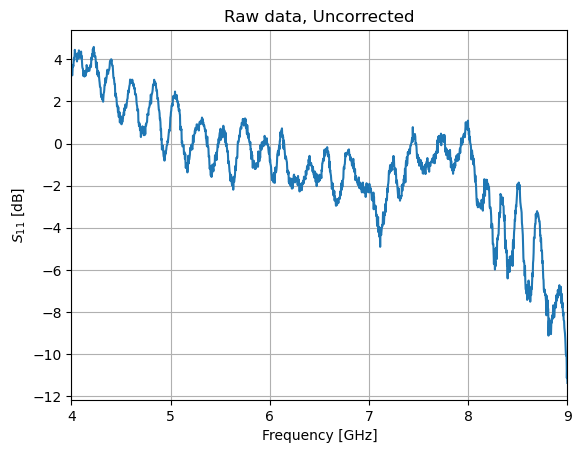

In [25]:
plt.plot(fghz,scandatas1p['trace0'].s_db[:,0,0])
plt.xlim(fghz[0],fghz[len(fghz)- 1])
plt.grid()
plt.xlabel('Frequency [GHz]')
plt.ylabel('$S_{11}$ [dB]')
plt.title('Raw data, Uncorrected')

In [2]:
data_corrected = rf.read_all('jpa-nopump-scan2-s1p-corrected')

In [3]:
data_corrected

{'trace0': 1-Port Network: 'trace0',  4000000000.0-9000000000.0 Hz, 1601 pts, z0=[50.+0.j],
 'trace1': 1-Port Network: 'trace1',  4000000000.0-9000000000.0 Hz, 1601 pts, z0=[50.+0.j],
 'trace10': 1-Port Network: 'trace10',  4000000000.0-9000000000.0 Hz, 1601 pts, z0=[50.+0.j],
 'trace100': 1-Port Network: 'trace100',  4000000000.0-9000000000.0 Hz, 1601 pts, z0=[50.+0.j],
 'trace1000': 1-Port Network: 'trace1000',  4000000000.0-9000000000.0 Hz, 1601 pts, z0=[50.+0.j],
 'trace1001': 1-Port Network: 'trace1001',  4000000000.0-9000000000.0 Hz, 1601 pts, z0=[50.+0.j],
 'trace1002': 1-Port Network: 'trace1002',  4000000000.0-9000000000.0 Hz, 1601 pts, z0=[50.+0.j],
 'trace1003': 1-Port Network: 'trace1003',  4000000000.0-9000000000.0 Hz, 1601 pts, z0=[50.+0.j],
 'trace1004': 1-Port Network: 'trace1004',  4000000000.0-9000000000.0 Hz, 1601 pts, z0=[50.+0.j],
 'trace1005': 1-Port Network: 'trace1005',  4000000000.0-9000000000.0 Hz, 1601 pts, z0=[50.+0.j],
 'trace1006': 1-Port Network: 'trace10

In [4]:
fghz = data_corrected['trace10'].f/1e9

Text(0.5, 1.0, 'Data Corrected with Port 6 Tier 2 Ecal')

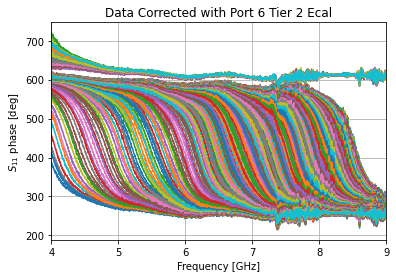

In [16]:
for index in range(len(data_corrected)):
    if not index % 5:
        plt.plot(fghz,data_corrected['trace' + str(index)].s_deg_unwrap[:,0,0] + 140*fghz)
plt.xlim(fghz[0],fghz[len(fghz)- 1])
plt.grid()
plt.xlabel('Frequency [GHz]')
plt.ylabel('$S_{11}$ phase [deg]')
plt.title('Data Corrected with Port 6 Tier 2 Ecal')

Text(0.5, 1.0, 'Data Corrected with Port 6 Tier 2 Ecal')

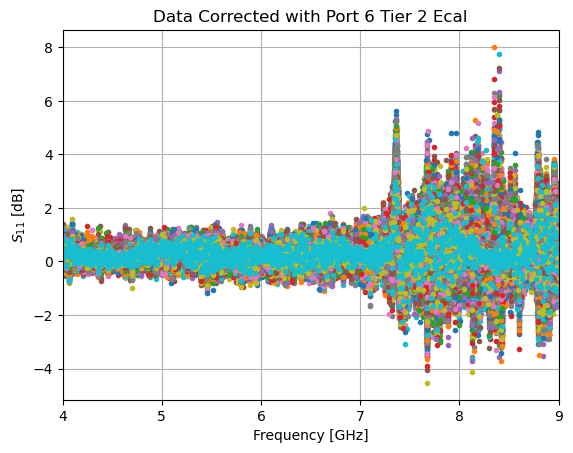

In [37]:
for index in range(len(scandatas1p)):
    if not index % 5:
        plt.plot(fghz,data_corrected['trace' + str(index)].s_db[:,0,0],'.')
plt.xlim(fghz[0],fghz[len(fghz)- 1])
plt.grid()
plt.xlabel('Frequency [GHz]')
plt.ylabel('$S_{11}$ [dB]')
plt.title('Data Corrected with Port 6 Tier 2 Ecal')

Text(0.5, 1.0, 'Corrected data at trace1250, 150 deg/GHz')

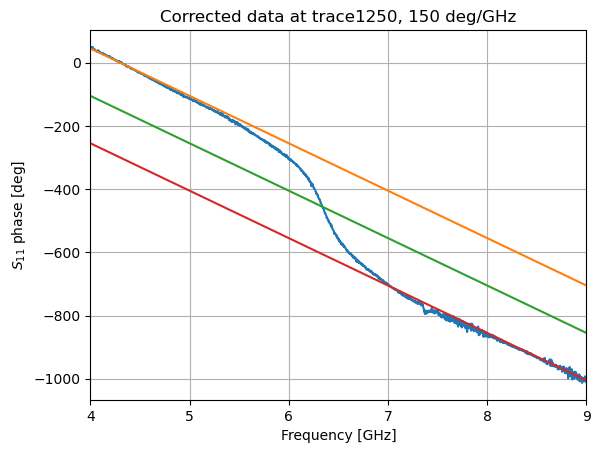

In [183]:
#for index in range(len(scandatas1p)):
#   if not index % 50:
#        plt.plot(fghz,data_corrected['trace' + str(index)].s_deg_unwrap[:,0,0])

triggerwave = 150*(3.3 - fghz)
plt.plot(fghz,data_corrected['trace1250'].s_deg_unwrap[:,0,0])
plt.plot(fghz,150*(4.3 - fghz))
plt.plot(fghz,150*(3.3 - fghz))#this is the line to use to detect resonance
plt.plot(fghz,150*(2.3 - fghz))
plt.xlim(fghz[0],fghz[len(fghz)- 1])
plt.grid()
plt.xlabel('Frequency [GHz]')
plt.ylabel('$S_{11}$ phase [deg]')
plt.title('Corrected data at trace1250, 150 deg/GHz')

Text(0.5, 1.0, 'Corrected data at trace 100, 145 deg/GHz')

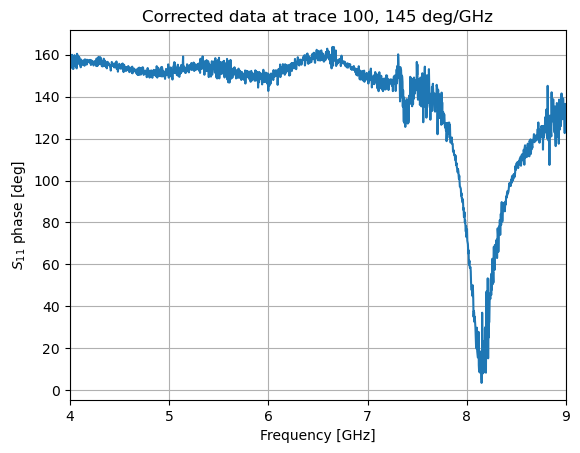

In [169]:
#for index in range(len(scandatas1p)):
#   if not index % 50:
#        plt.plot(fghz,data_corrected['trace' + str(index)].s_deg_unwrap[:,0,0])

triggerwave = 150*(3.3 - fghz)
plt.plot(fghz,np.abs(data_corrected['trace1850'].s_deg_unwrap[:,0,0] - triggerwave))
plt.xlim(fghz[0],fghz[len(fghz)- 1])
plt.grid()
plt.xlabel('Frequency [GHz]')
plt.ylabel('$S_{11}$ phase [deg]')
plt.title('Corrected data at trace 100, 145 deg/GHz')


In [155]:
file_object = open("jpa-nopump-scan2/biaswave.json", "r")
json_string = file_object.read()
file_object.close()
biaswave = np.array(json.loads(json_string))

Text(0.5, 1.0, 'Corected Data, subtracted line')

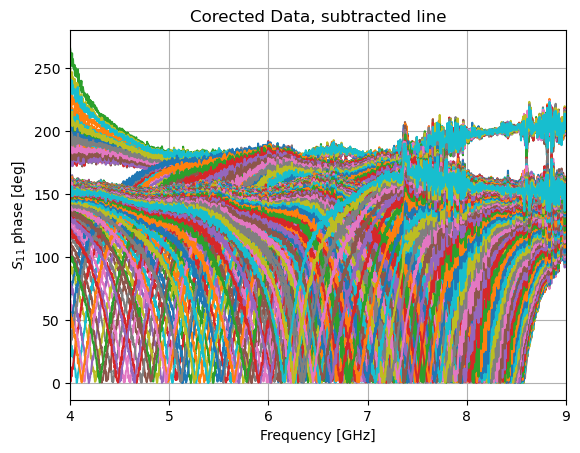

In [173]:
for index in range(len(scandatas1p)):
    if not index % 5:
        plt.plot(fghz,np.abs(data_corrected['trace' + str(index)].s_deg_unwrap[:,0,0] - triggerwave))

plt.xlim(fghz[0],fghz[len(fghz)- 1])
plt.grid()
plt.xlabel('Frequency [GHz]')
plt.ylabel('$S_{11}$ phase [deg]')
plt.title('Corected Data, subtracted line')


In [175]:
fwave = np.zeros(len(biaswave))

for index in range(len(scandatas1p)):
    fwave[index] = fghz[np.argmin(np.abs(data_corrected['trace' + str(index)].s_deg_unwrap[:,0,0] - triggerwave))]


Text(0, 0.5, 'Resonance Frequency [GHz]')

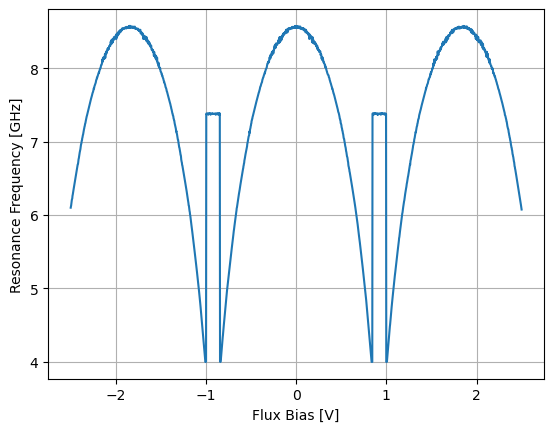

In [179]:
plt.plot(biaswave,fwave)
plt.grid()
#plt.xlim(biaswave[0],1.2)
plt.xlabel('Flux Bias [V]')
plt.ylabel('Resonance Frequency [GHz]')

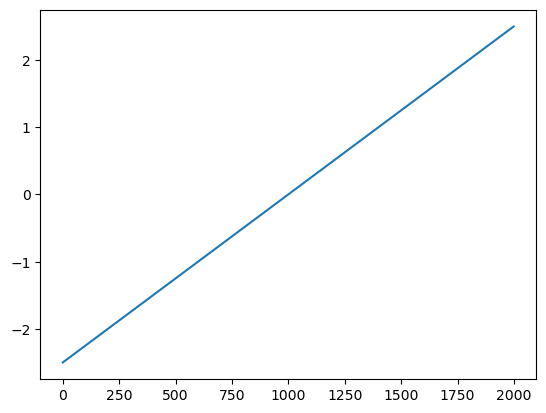

In [181]:
plt.plot(biaswave)